# Exploratory Data Analysis


## 1. Libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import emoji

## 2. Reading data

In [43]:
df = pd.read_parquet('data/03.cleaned/df_combined.parquet')

In [44]:
df

,reply_settings,created_at,attachments,edit_controls,author_id,edit_history_tweet_ids,lang,possibly_sensitive,id,conversation_id,...,reply_count,like_count,quote_count,impression_count,text_clean_en,text_clean_en_demojized,text_clean_demojized,emoji_count_en,emoji_count,name
0,everyone,2024-10-15 07:13:34+00:00,"{'media_keys': ['3_1846083966849159168', '3_18...",{'editable_until': '2024-10-15 08:12:39+00:00'...,1.284852e+18,"[1846086770229694583, 1846086999964283214]",pl,False,1846086999964283136,1.846087e+18,...,61,644,7,11648,❌ The Polish government intends to build 49 F...,:cross_mark: The Polish government intends to...,:cross_mark: Rząd polski zamierza budować w ...,2,3,Grzegorz Płaczek
1,everyone,2024-10-14 08:46:51+00:00,None,{'editable_until': '2024-10-14 09:43:52+00:00'...,1.284852e+18,"[1845747336862961872, 1845748090461966651]",pl,False,1845748090461966592,1.845748e+18,...,169,3845,57,146584,❌ The cesspool is breaking out and it's getti...,:cross_mark: The cesspool is breaking out and...,:cross_mark: Szambo wybija i robi się coraz ...,1,1,Grzegorz Płaczek
2,everyone,2024-10-13 07:30:58+00:00,None,{'editable_until': '2024-10-13 08:30:58+00:00'...,1.284852e+18,[1845366606823657982],pl,False,1845366606823657984,1.845367e+18,...,145,2061,28,100757,❌ I DON'T UNDERSTAND HOW YOU CAN HURT YOUR OW...,:cross_mark: I DON'T UNDERSTAND HOW YOU CAN H...,":cross_mark: NIE ROZUMIEM, JAK MOŻNA KRZYWDZ...",1,1,Grzegorz Płaczek
3,everyone,2024-10-12 07:38:50+00:00,None,{'editable_until': '2024-10-12 08:38:50+00:00'...,1.284852e+18,[1845006197847359885],pl,False,1845006197847360000,1.845006e+18,...,56,989,8,30769,🆘 The pharmaceutical company GSK will pay ove...,:SOS_button: The pharmaceutical company GSK w...,:SOS_button: Firma farmaceutyczna GSK zapła...,2,3,Grzegorz Płaczek
4,everyone,2024-10-11 06:56:29+00:00,None,{'editable_until': '2024-10-11 07:56:29+00:00'...,1.284852e+18,[1844633149784891665],pl,False,1844633149784891648,1.844633e+18,...,56,678,9,17432,"❌ WHAT IS GOING ON HERE? In October 2024, her...",:cross_mark: WHAT IS GOING ON HERE? In Octobe...,:cross_mark: O CO TUTAJ CHODZI? W październi...,2,3,Grzegorz Płaczek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48326,everyone,2022-11-04 17:02:07+00:00,None,{'editable_until': '2022-11-04 17:32:07+00:00'...,1.119834e+09,[1588577342594482176],pl,False,1588577342594482176,1.588577e+18,...,0,3,1,0,Regulation banning the registration of new car...,Regulation banning the registration of new car...,Rozporządzenie o zakazie rejestracji nowych sa...,0,0,Andrzej Grzyb
48327,everyone,2022-11-04 07:02:07+00:00,None,{'editable_until': '2022-11-04 07:32:07+00:00'...,1.119834e+09,[1588426347646533634],pl,False,1588426347646533632,1.588426e+18,...,0,2,1,0,Putin's gas war. Europe has broken the blackma...,Putin's gas war. Europe has broken the blackma...,Wojna gazowa Putina. Europa przełamała szantaż...,0,0,Andrzej Grzyb
48328,everyone,2022-10-29 12:23:28+00:00,None,{'editable_until': '2022-10-29 12:53:28+00:00'...,1.119834e+09,[1586332889444237312],pl,False,1586332889444237312,1.586333e+18,...,0,2,1,0,Scientists know how to ensure that renewable e...,Scientists know how to ensure that renewable e...,"Naukowcy wiedzą jak sprawić, by OZE nie zależa...",0,0,Andrzej Grzyb
48329,everyone,2022-10-21 07:33:09+00:00,None,{'editable_until': '2022-10-21 08:03:09+00:00'...,1.119834e+09,[1583360725958828034],pl,False,1583360725958828032,1.583361e+18,...,0,2,1,0,Chaos on the energy market. Terminated contrac...,Chaos on the energy market. Terminated contrac...,Chaos na rynku energii. Zrywane umowy i zamroż...,0,0,Andrzej Grzyb


## 3. Exploratory Data Analysis

### 3.1 Categories of tweets

category
Original    32630
Reply       10291
Quote        5410
Name: count, dtype: int64
Total tweets: 48331


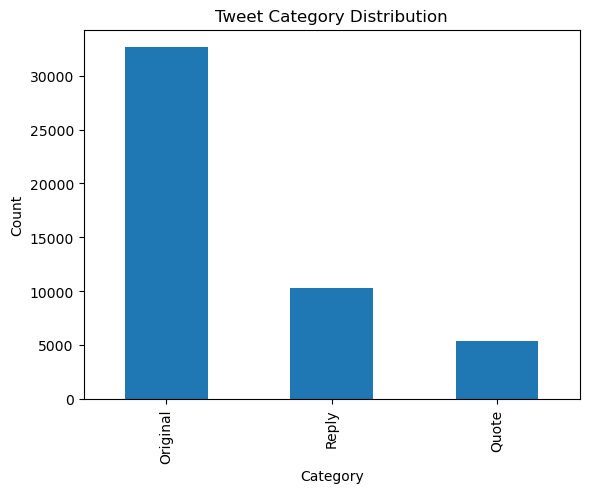

In [45]:
# Plot the category summary as a bar plot
category_summary = df['category'].value_counts()
print(category_summary)
total_tweets = category_summary.sum()
print(f"Total tweets: {total_tweets}")

category_summary.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Tweet Category Distribution')
plt.show()

Most of the downloaded tweets are original posts from politicians.

### 3.2 The most active users

#### 3.2.1 General (all posts)

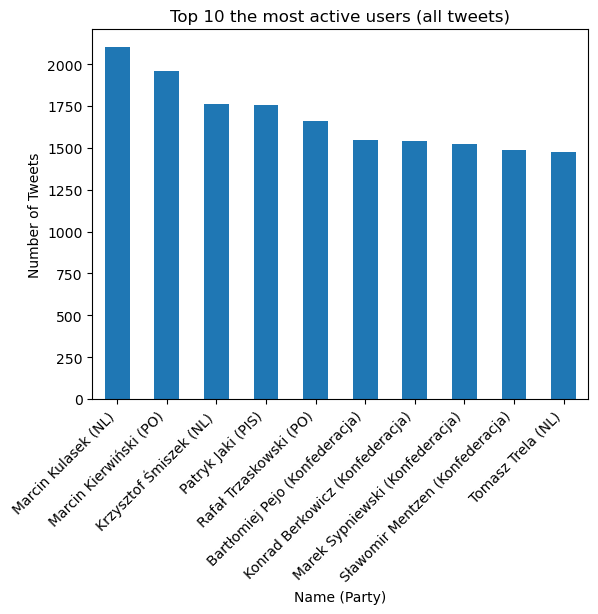

In [46]:
top_ten_users = df['name'].value_counts().head(10)
top_ten_users_df = top_ten_users.reset_index()
top_ten_users_df.columns = ['name', 'count']

top_ten_users_with_party = top_ten_users_df.merge(df[['name', 'party']].drop_duplicates(), on='name', how='left')

top_ten_users_with_party.plot(kind='bar', x='name', y='count', legend=False)
plt.xlabel('Name (Party)')
plt.ylabel('Number of Tweets')
plt.title('Top 10 the most active users (all tweets)')
labels = top_ten_users_with_party.apply(lambda row: f"{row['name']} ({row['party']})", axis=1)
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right')
plt.show()

The three most active users are Patryk Jaki (PIS), Bartłomiej Pejo (Konfederacja), and Włodzimierz Skalik (Konfederacja). Each of them published around 1000 tweets in one year, averaging more than 2.5 tweets per day.

#### 3.2.2 General (only original posts)

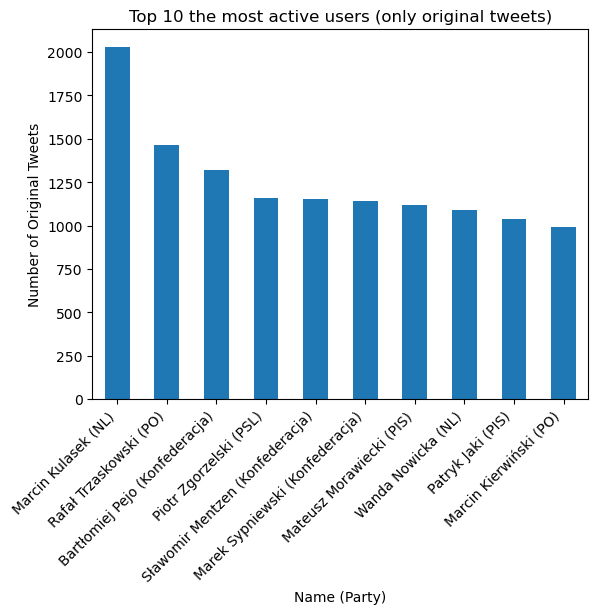

In [47]:
original_posts_df = df[df['category'] == 'Original']

top_ten_original_users = original_posts_df['name'].value_counts().head(10).reset_index()
top_ten_original_users.columns = ['name', 'count']

top_ten_original_users_with_party = top_ten_original_users.merge(df[['name', 'party']].drop_duplicates(), on='name', how='left')

top_ten_original_users_with_party.plot(kind='bar', x='name', y='count', legend=False)
plt.xlabel('Name (Party)')
plt.ylabel('Number of Original Tweets')
plt.title('Top 10 the most active users (only original tweets)')
labels = top_ten_original_users_with_party.apply(lambda row: f"{row['name']} ({row['party']})", axis=1)
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right')
plt.show()

The most active poster was Bartłomiej Pejo (Konfederacja), who wrote more than 800 tweets, averaging over two tweets per day.

#### 3.2.3 The most active users for party (all tweets)

          party               name  counts
0  Konfederacja    Bartłomiej Pejo    1546
1            NL     Marcin Kulasek    2102
2           PIS        Patryk Jaki    1755
3        PL2050         Paweł Śliz    1236
4            PO  Marcin Kierwiński    1957
5           PSL   Piotr Zgorzelski    1179


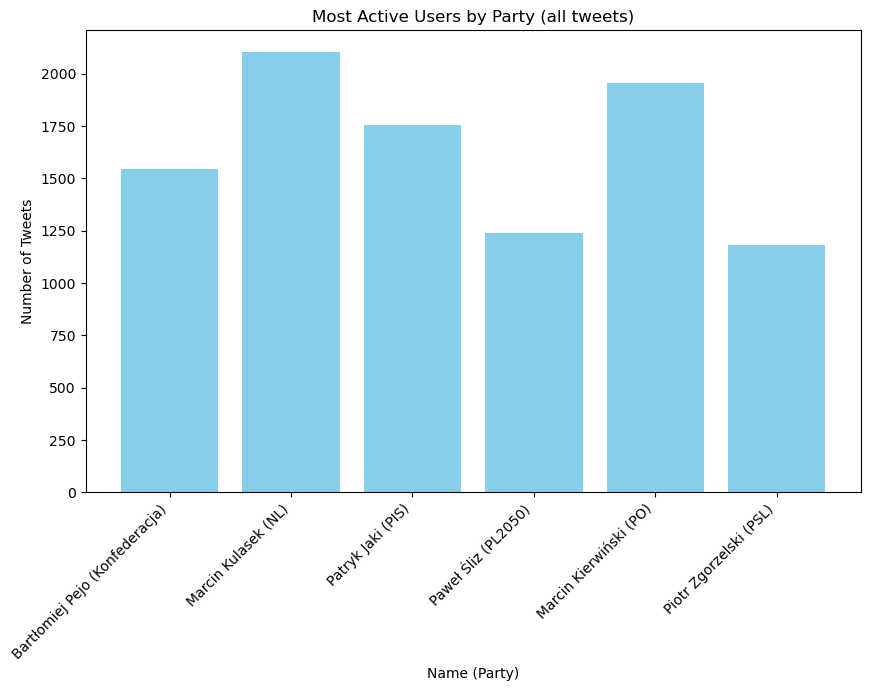

In [48]:
most_active_users = df.groupby('party')['name'].agg(lambda x: x.value_counts().idxmax())
tweet_counts = df.groupby(['party', 'name']).size().reset_index(name='counts')
most_active_users_with_counts = most_active_users.reset_index().merge(tweet_counts, on=['party', 'name'])
print(most_active_users_with_counts)
plt.figure(figsize=(10, 6))
plt.bar(most_active_users_with_counts['name'], most_active_users_with_counts['counts'], color='skyblue')
plt.xlabel('Name (Party)')
plt.ylabel('Number of Tweets')
plt.title('Most Active Users by Party (all tweets)')
plt.xticks(rotation=45, ha='right')
labels = most_active_users_with_counts.apply(lambda row: f"{row['name']} ({row['party']})", axis=1)
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right')
plt.show()

The activity levels of the most active politicians from each party vary significantly. In Konfederacja and PIS, the most active users have around 1000 tweets, whereas in other parties, the most active users have around 400 tweets. In PL2050, the most active politician has approximately 2050 tweets.

#### 3.2.4 The most active users for party (only original tweets)

          party                name  counts
0  Konfederacja     Bartłomiej Pejo    1546
1            NL      Marcin Kulasek    2102
2           PIS  Mateusz Morawiecki    1257
3        PL2050     Szymon Hołownia     502
4            PO   Rafał Trzaskowski    1663
5           PSL    Piotr Zgorzelski    1179


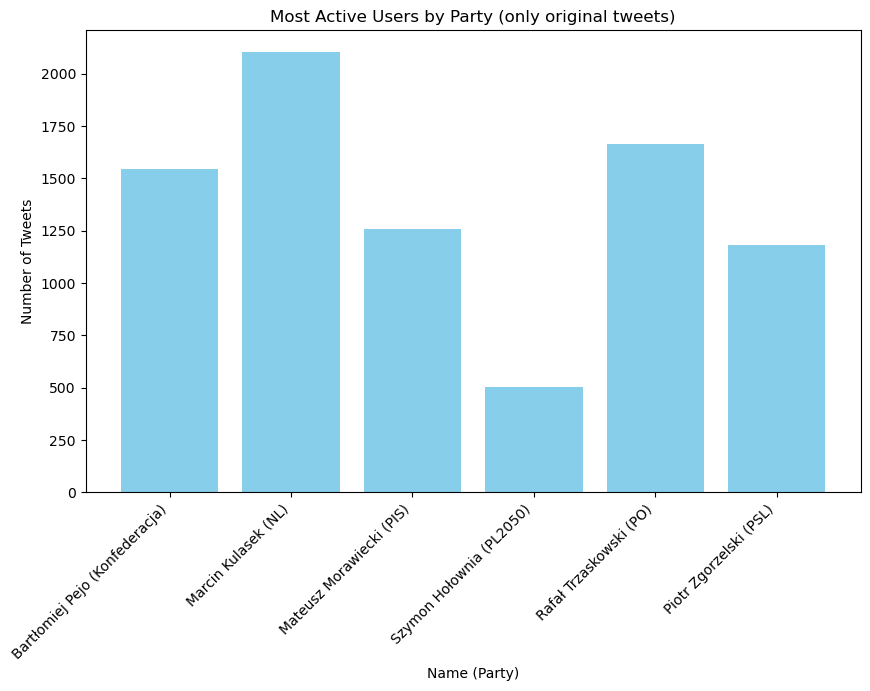

In [49]:
most_active_users = original_posts_df.groupby('party')['name'].agg(lambda x: x.value_counts().idxmax())
tweet_counts = df.groupby(['party', 'name']).size().reset_index(name='counts')
most_active_users_with_counts = most_active_users.reset_index().merge(tweet_counts, on=['party', 'name'])
print(most_active_users_with_counts)
plt.figure(figsize=(10, 6))
plt.bar(most_active_users_with_counts['name'], most_active_users_with_counts['counts'], color='skyblue')
plt.xlabel('Name (Party)')
plt.ylabel('Number of Tweets')
plt.title('Most Active Users by Party (only original tweets)')
plt.xticks(rotation=45, ha='right')
labels = most_active_users_with_counts.apply(lambda row: f"{row['name']} ({row['party']})", axis=1)
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right')
plt.show()

### 3.3 Number of tweets per Party 

### 3.3.1 All tweets

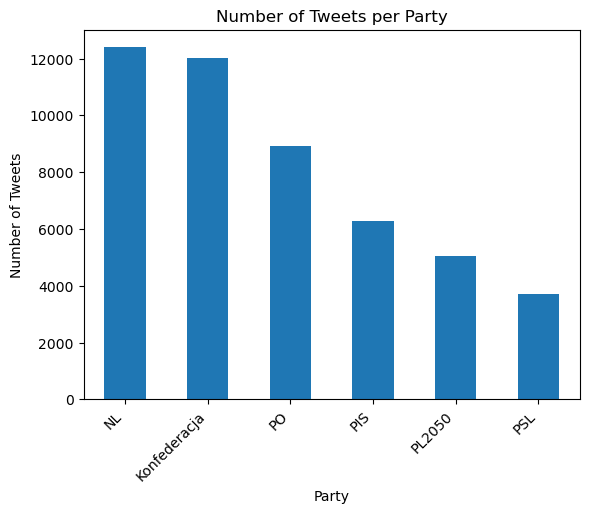

In [50]:
tweets_per_party = df['party'].value_counts()
tweets_per_party.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Party')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 3.3.2 Only original tweets

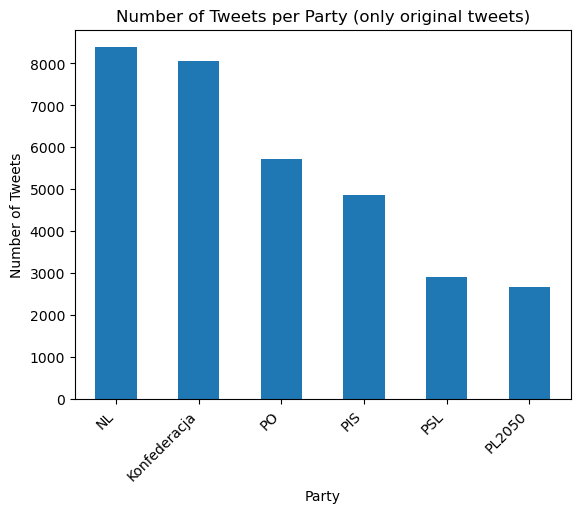

In [51]:
tweets_per_party = original_posts_df['party'].value_counts()
tweets_per_party.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Party (only original tweets)')
plt.xticks(rotation=45, ha='right')
plt.show()

### 3.4 Publication time analysis 

#### 3.4.1 General

Spike around euroelection

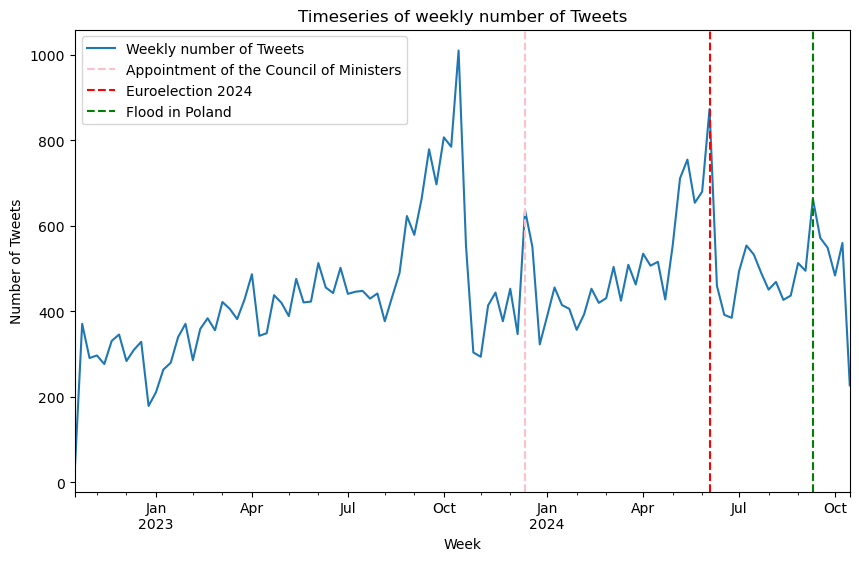

created_at
2023-10-15 00:00:00+00:00    1010
2024-06-09 00:00:00+00:00     873
2023-10-01 00:00:00+00:00     807
2023-10-08 00:00:00+00:00     785
2023-09-17 00:00:00+00:00     779
dtype: int64


In [52]:
df['created_at'] = pd.to_datetime(df['created_at'])
df_time = df.copy()
df_time.set_index('created_at', inplace=True)
weekly_tweets = df_time.resample('W').size()
weekly_tweets.plot(kind='line', figsize=(10, 6), label='Weekly number of Tweets')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.title('Timeseries of weekly number of Tweets')
council_date = pd.to_datetime('2023-12-13')
plt.axvline(x=council_date, color='pink', linestyle='--', label='Appointment of the Council of Ministers')
euroelection_date = pd.to_datetime('2024-06-09')
plt.axvline(x=euroelection_date, color='red', linestyle='--', label='Euroelection 2024')
flood_date = pd.to_datetime('2024-09-15')
plt.axvline(x=flood_date, color='green', linestyle='--', label='Flood in Poland')
plt.legend()
plt.show()
weekly_tweets_sorted = weekly_tweets.sort_values(ascending=False)
print(weekly_tweets_sorted.head(5))

We can observe that peeks overlap with important political events.

#### 3.4.2 By Party

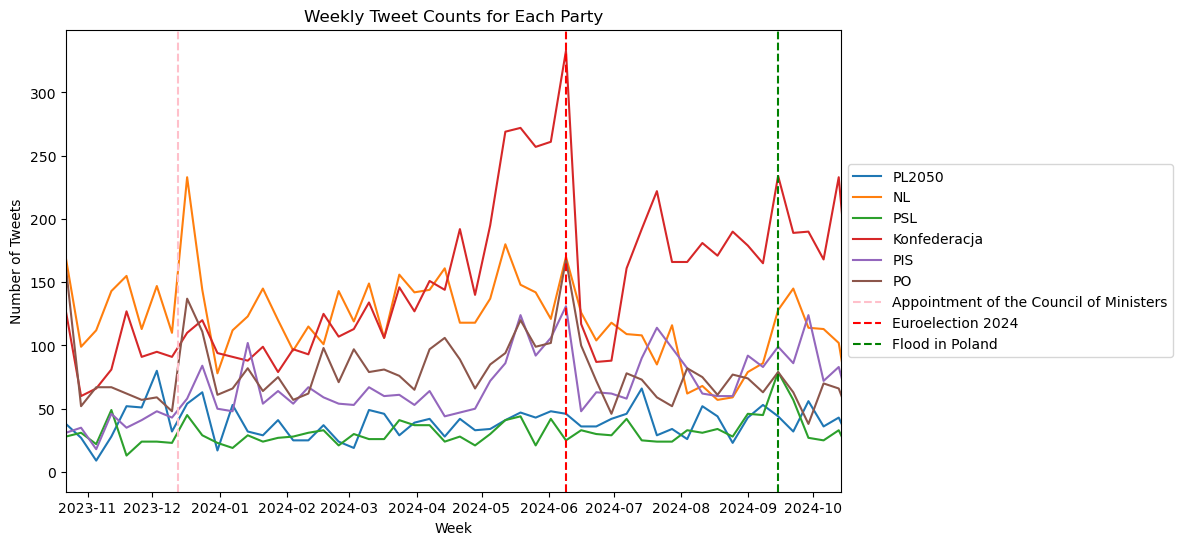

In [53]:
df_time_sorted = df_time.sort_index()
df_time_sorted['created_at'] = pd.to_datetime(df_time_sorted.index)
df_time_sorted.set_index('created_at', inplace=True)
parties = df_time_sorted['party'].unique()
plt.figure(figsize=(10, 6))
for party in parties:
    party_df = df_time_sorted[df_time_sorted['party'] == party]
    weekly_tweets = party_df.resample('W').size()
    plt.plot(weekly_tweets, label=party)
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.title('Weekly Tweet Counts for Each Party')

plt.xlim(pd.to_datetime('2023-10-22'), pd.to_datetime('2024-10-14'))
council_date = pd.to_datetime('2023-12-13')
plt.axvline(x=council_date, color='pink', linestyle='--', label='Appointment of the Council of Ministers')
euroelection_date = pd.to_datetime('2024-06-09')
plt.axvline(x=euroelection_date, color='red', linestyle='--', label='Euroelection 2024')
flood_date = pd.to_datetime('2024-09-15')
plt.axvline(x=flood_date, color='green', linestyle='--', label='Flood in Poland')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


We can observe that PO was the most active party after the parliamentary election and the appointment of the Council of Ministers. During the Euroelection, PIS and Konfederacja were more active. During the flood, there was a significant gap in activity between Konfederacja and PIS compared to other parties.

### 3.5 Average number of words in tweets

#### 3.5.1 By category

   category  word_count
0  Original   25.801483
1     Quote   16.471055
2     Reply   15.696201


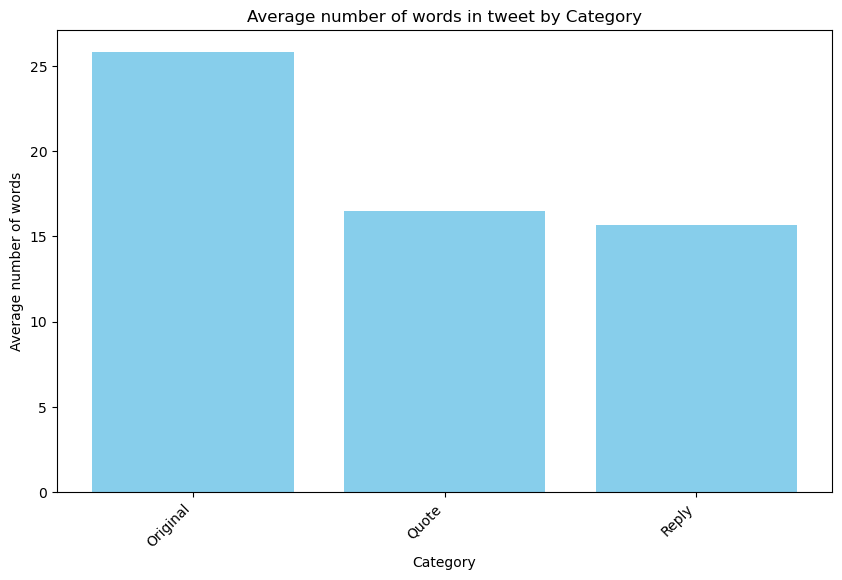

In [54]:
df['word_count'] = df['text_clean'].apply(lambda x: len(x.split()))

user_word_count_summary = df.groupby(['party', 'username', 'category'])['word_count'].mean().reset_index()

category_word_count_summary = user_word_count_summary.groupby(['category'])['word_count'].mean().reset_index()
print(category_word_count_summary)

plt.figure(figsize=(10, 6))
plt.bar(category_word_count_summary['category'], category_word_count_summary['word_count'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average number of words')
plt.title('Average number of words in tweet by Category')
plt.xticks(rotation=45, ha='right')
plt.show()

As expected, original tweets are the longest type of posts on average.

#### 3.5.2 By party

          party  word_count
2           PIS   25.920739
5           PSL   21.044300
3        PL2050   20.279095
0  Konfederacja   19.426852
4            PO   17.433799
1            NL   15.689499


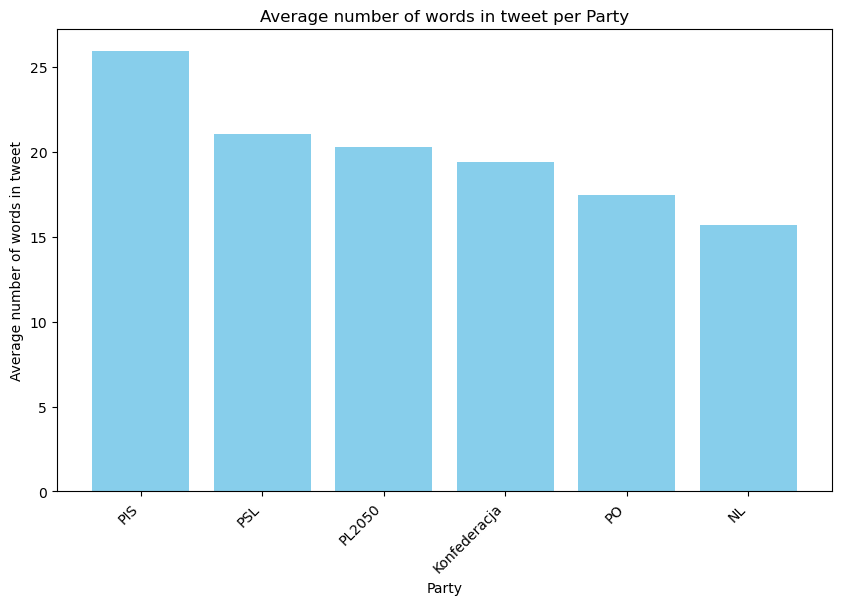

In [55]:
party_user_word_count_summary = user_word_count_summary.groupby('party')['word_count'].mean().reset_index()
party_user_word_count_summary = party_user_word_count_summary.sort_values(by='word_count', ascending=False)
print(party_user_word_count_summary)
plt.figure(figsize=(10, 6))
plt.bar(party_user_word_count_summary['party'], party_user_word_count_summary['word_count'], color='skyblue')
plt.xlabel('Party')
plt.ylabel('Average number of words in tweet')
plt.title('Average number of words in tweet per Party')
plt.xticks(rotation=45, ha='right')
plt.show()

We can observe that politicians from PIS tend to write the longest posts, while those from NL generally prefer shorter ones. However, it is worth noting that the difference in the average number of words is only 5, which is around 25% of the average post length.

#### 3.5.3 By user

           party                       name  word_count
30           PIS          Mariusz Błaszczak   34.095541
39        PL2050       Katarzyna Pelczyńska   33.583618
29           PIS           Henryk Kowalczyk   32.541045
31           PIS           Mariusz Kamiński   31.953846
6   Konfederacja               Michał Wawer   31.131994
52            PO                 Ewa Kopacz   31.041841
68           PSL  Władysław Kosiniak-Kamysz   30.916873
61           PSL               Adam Struzik   29.714286
27           PIS               Beata Szydło   28.841197
24            NL              Wanda Nowicka   28.609622


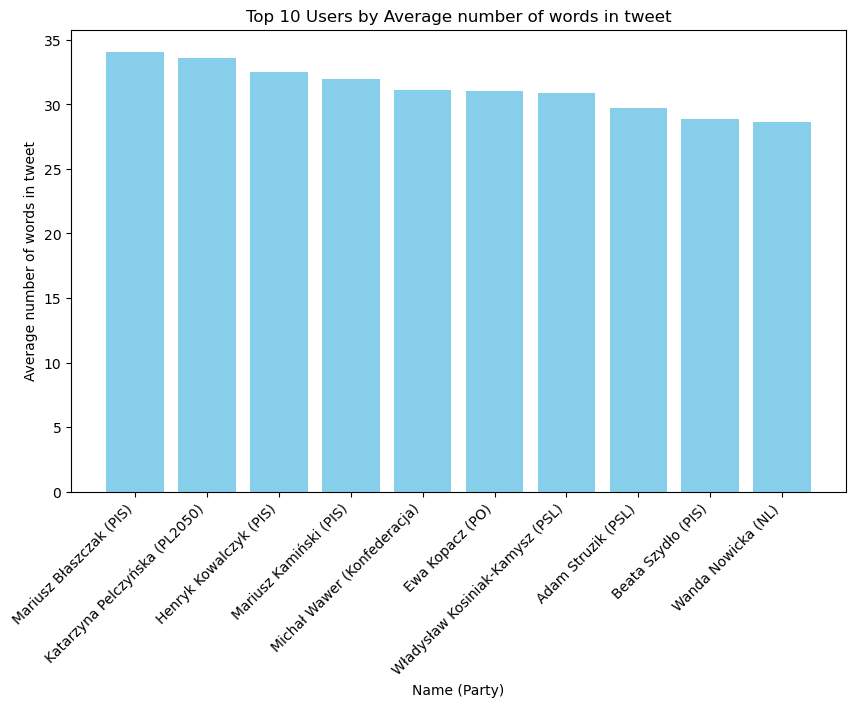

In [56]:
user_word_count_summary = df.groupby(['party', 'name'])['word_count'].mean().reset_index()

top_10_word_count = user_word_count_summary.sort_values(by='word_count', ascending=False).head(10)
print(top_10_word_count)

plt.figure(figsize=(10, 6))
plt.bar(top_10_word_count['name'] + ' (' + top_10_word_count['party'] + ')', top_10_word_count['word_count'], color='skyblue')
plt.xlabel('Name (Party)')
plt.ylabel('Average number of words in tweet')
plt.title('Top 10 Users by Average number of words in tweet')
plt.xticks(rotation=45, ha='right')
plt.show()


We can observe that the number of words used in tweets is not entirely dependent on the party affiliation. It appears to be more of a personal characteristic. However, it is interesting to note that none of the top 10 users by average number of words per tweet are from Konfederacja.

#### 3.5.4 Histograms per party

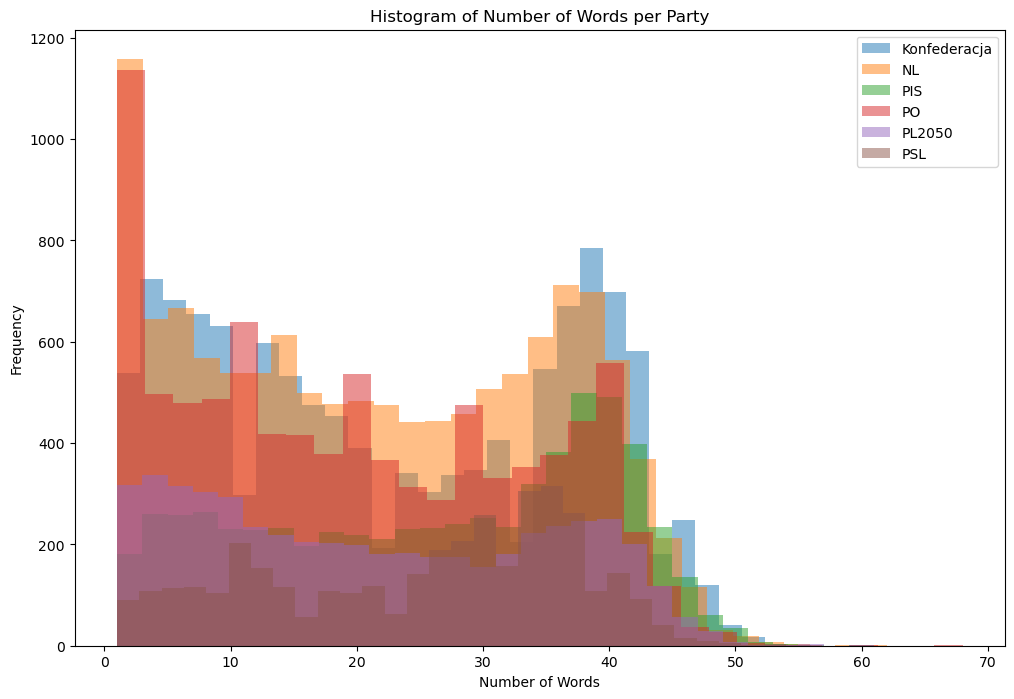

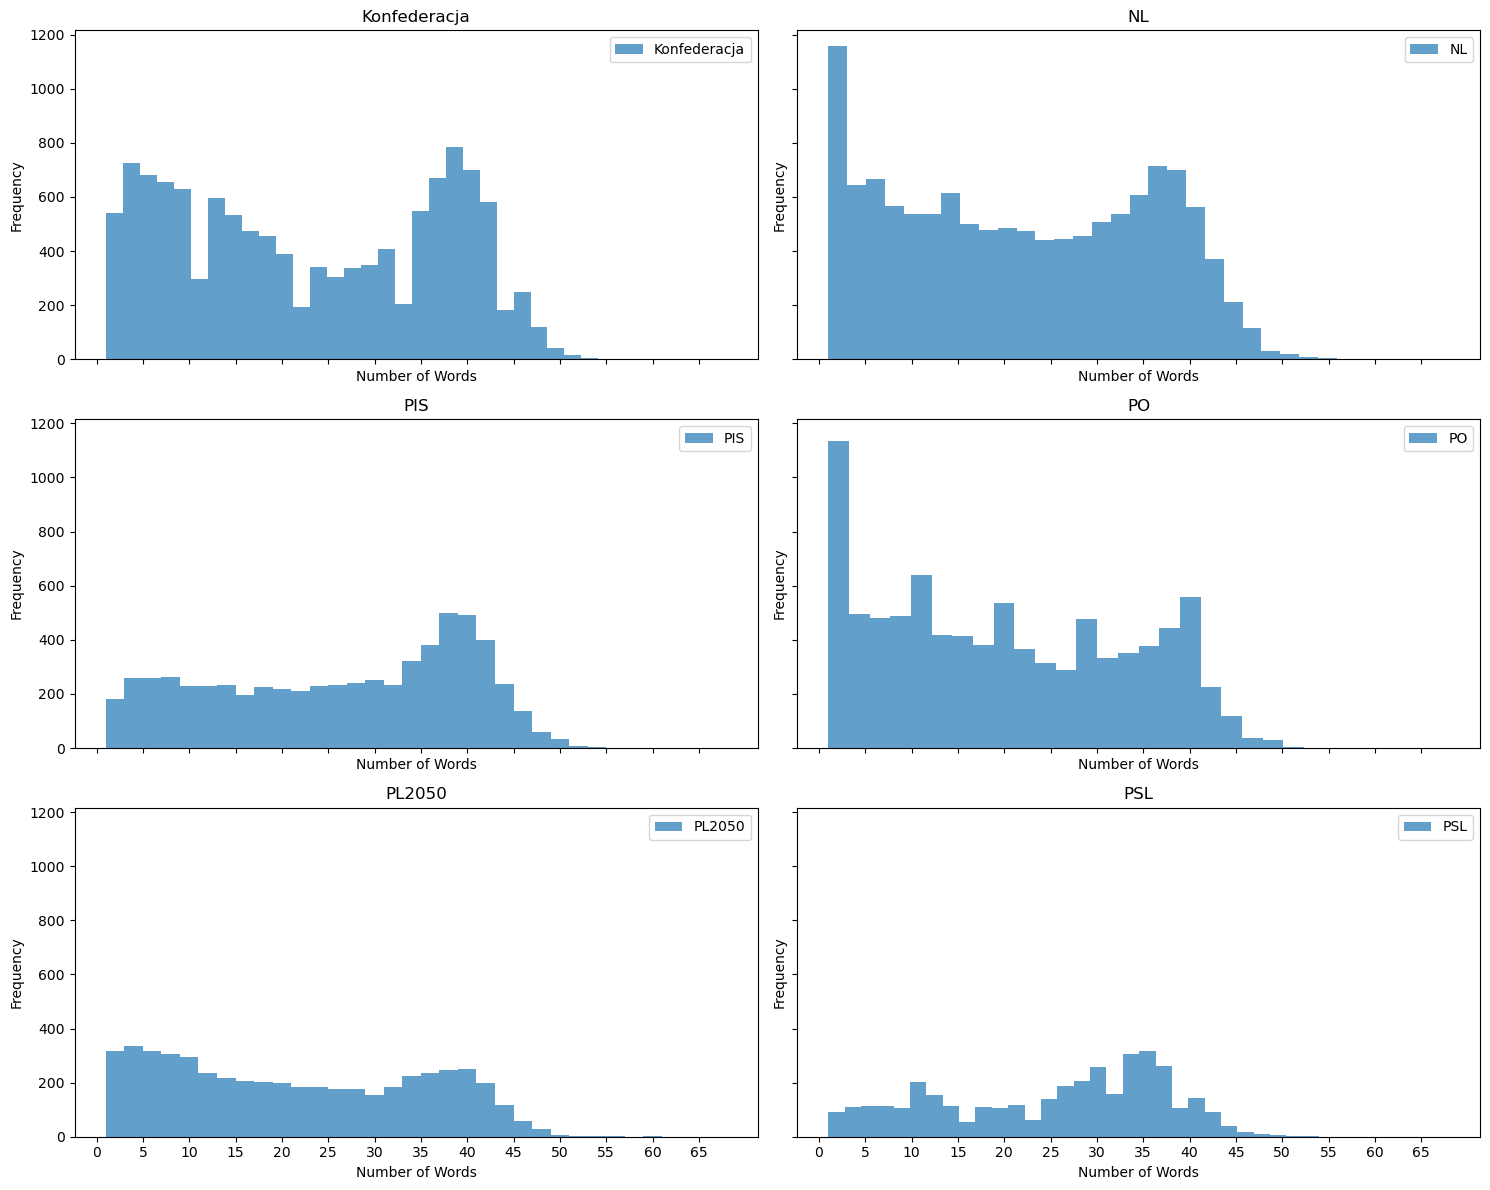

In [57]:
parties = df['party'].unique()
plt.figure(figsize=(12, 8))

for party in parties:
    plt.hist(df[df['party'] == party]['word_count'], bins=30, alpha=0.5, label=party)

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words per Party')
plt.legend()
plt.show()
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, party in enumerate(parties):
    axes[i].hist(df[df['party'] == party]['word_count'], bins=30, alpha=0.7, label=party)
    axes[i].set_title(f'{party}')
    axes[i].set_xlabel('Number of Words')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].set_xticks(range(0, df['word_count'].max() + 1, 5))  # Set x-axis scale

plt.tight_layout()
plt.show()


We can observe that the most common tweet lengths are very short, up to 5 words, and around 10 words. Interestingly, there is also a notable peak at around 40 words. Each party shows a significant number of tweets with approximately 40 words.

### 3.6 Average number of emojis in tweets

#### 3.6.1 By party

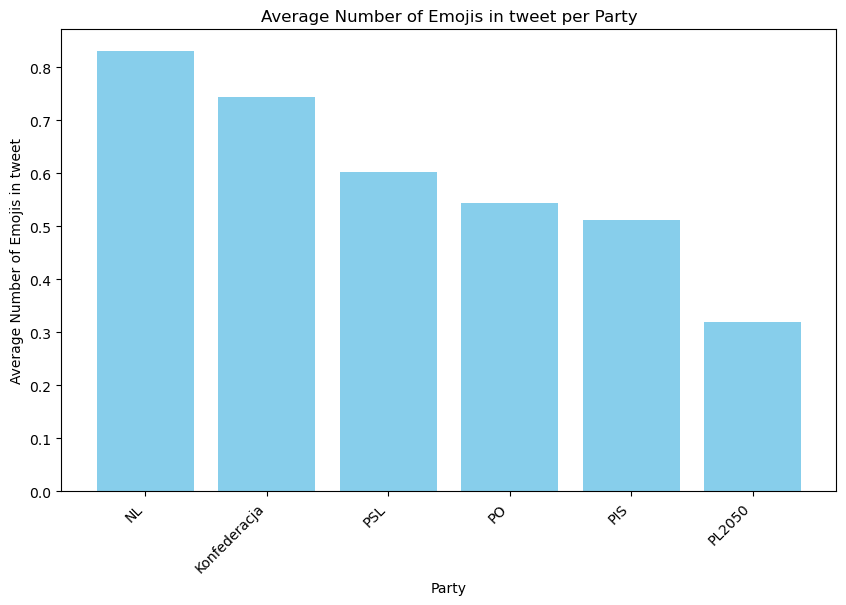

          party  average_emoji_per_post
1            NL                0.829729
0  Konfederacja                0.744231
5           PSL                0.602211
4            PO                0.543229
2           PIS                0.511012
3        PL2050                0.319027


In [58]:
def count_emojis(text):
    return sum(1 for char in text if char in emoji.EMOJI_DATA)
df['emoji_count'] = df['text_clean'].apply(count_emojis)
emoji_counts_per_party = df.groupby('party')['emoji_count'].sum().reset_index()
emoji_counts_per_party.columns = ['party', 'total_emoji_count']
average_emoji_per_post_per_party = df.groupby('party')['emoji_count'].mean().reset_index()
average_emoji_per_post_per_party.columns = ['party', 'average_emoji_per_post']
average_emoji_per_post_per_party = average_emoji_per_post_per_party.sort_values(by='average_emoji_per_post', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(average_emoji_per_post_per_party['party'], average_emoji_per_post_per_party['average_emoji_per_post'], color='skyblue')
plt.xlabel('Party')
plt.ylabel('Average Number of Emojis in tweet')
plt.title('Average Number of Emojis in tweet per Party')
plt.xticks(rotation=45, ha='right')
plt.show()
print(average_emoji_per_post_per_party)

Politicians in Nowa Lewica use, on average, more than one emoji per tweet, while those in PL2050 use only 0.2 emojis per tweet on average.

#### 3.6.2 By user

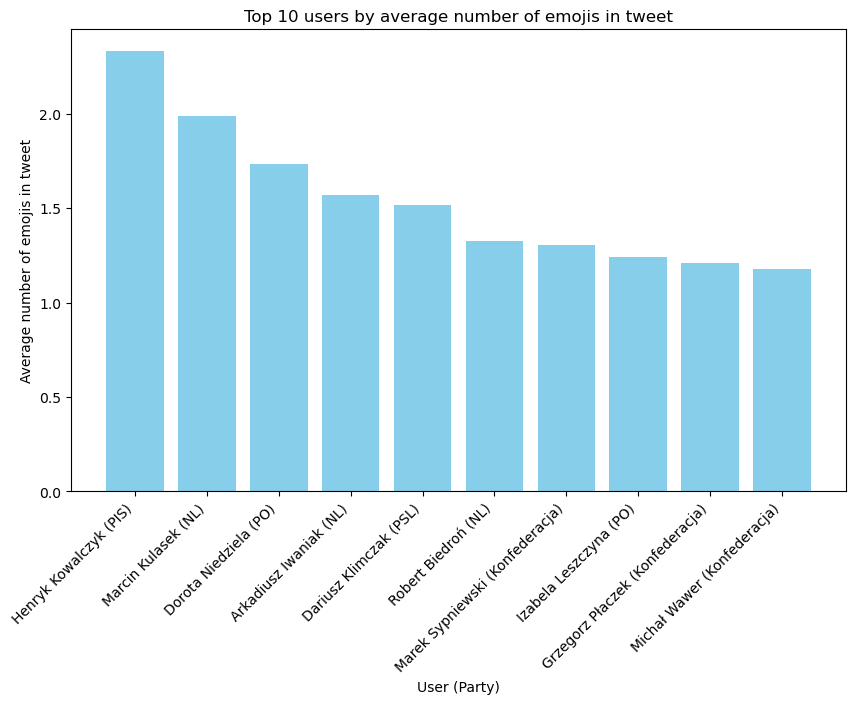

                name  average_emoji_per_post         party
0   Henryk Kowalczyk                2.328358           PIS
1     Marcin Kulasek                1.988107            NL
2   Dorota Niedziela                1.731947            PO
3  Arkadiusz Iwaniak                1.566667            NL
4   Dariusz Klimczak                1.516820           PSL
5     Robert Biedroń                1.326531            NL
6   Marek Sypniewski                1.306579  Konfederacja
7  Izabela Leszczyna                1.241901            PO
8   Grzegorz Płaczek                1.209886  Konfederacja
9       Michał Wawer                1.177905  Konfederacja


In [59]:
emoji_counts_per_user = df.groupby('name')['emoji_count'].sum().reset_index()
emoji_counts_per_user.columns = ['name', 'total_emoji_count']
average_emoji_per_post_per_user = df.groupby('name')['emoji_count'].mean().reset_index()
average_emoji_per_post_per_user.columns = ['name', 'average_emoji_per_post']
average_emoji_per_post_per_user = average_emoji_per_post_per_user.sort_values(by='average_emoji_per_post', ascending=False)

top_10_emoji_users = average_emoji_per_post_per_user.head(10)
top_10_emoji_users = top_10_emoji_users.merge(df[['name', 'party']].drop_duplicates(), on='name', how='left')

plt.figure(figsize=(10, 6))
plt.bar(top_10_emoji_users['name'] + ' (' + top_10_emoji_users['party'] + ')', top_10_emoji_users['average_emoji_per_post'], color='skyblue')
plt.xlabel('User (Party)')
plt.ylabel('Average number of emojis in tweet')
plt.title('Top 10 users by average number of emojis in tweet')
plt.xticks(rotation=45, ha='right')
plt.show()

print(top_10_emoji_users)

We can observe that some politicians use more than 1.5 emojis per tweet.

#### 3.7 Public metrics

#### 3.7.1 By party

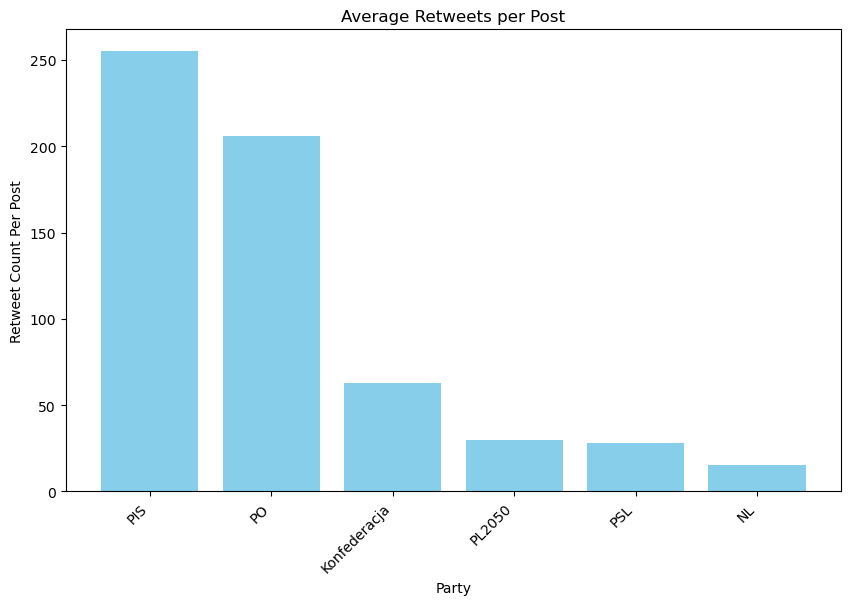

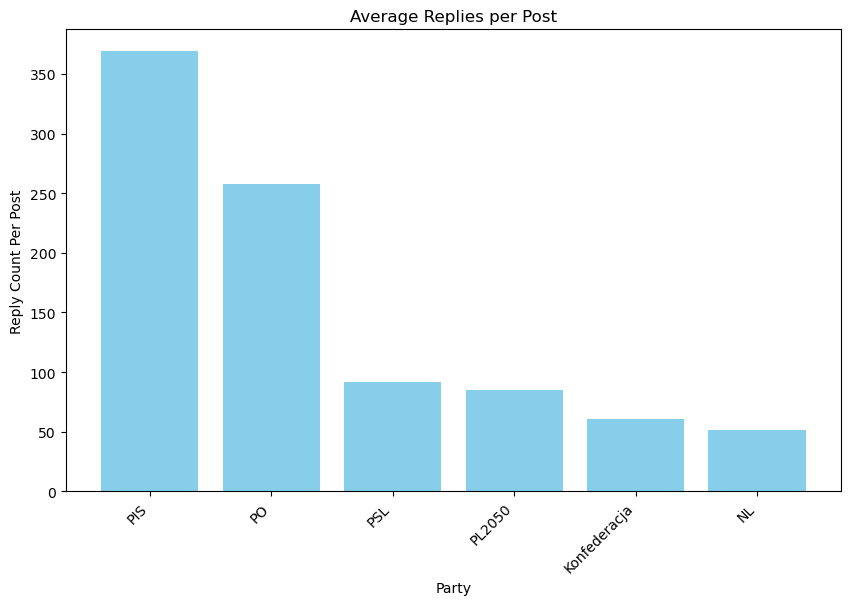

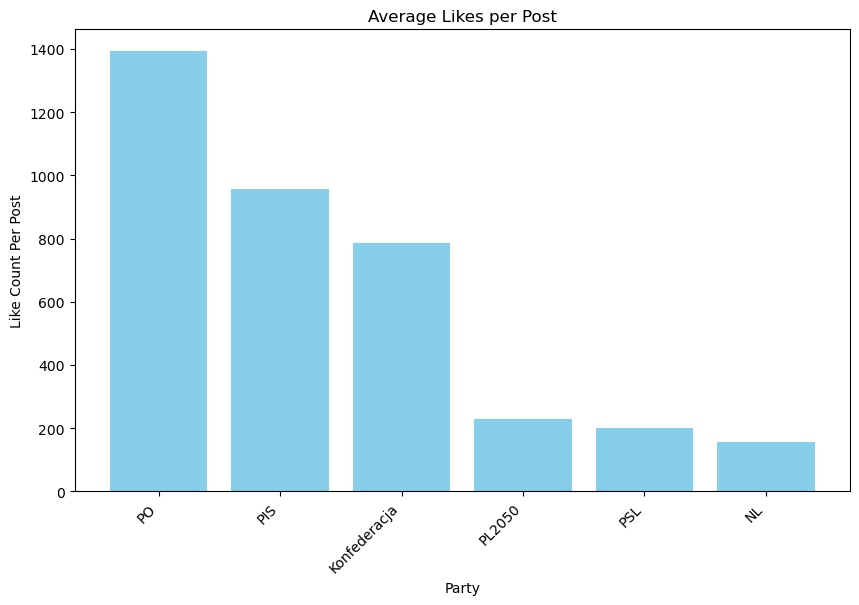

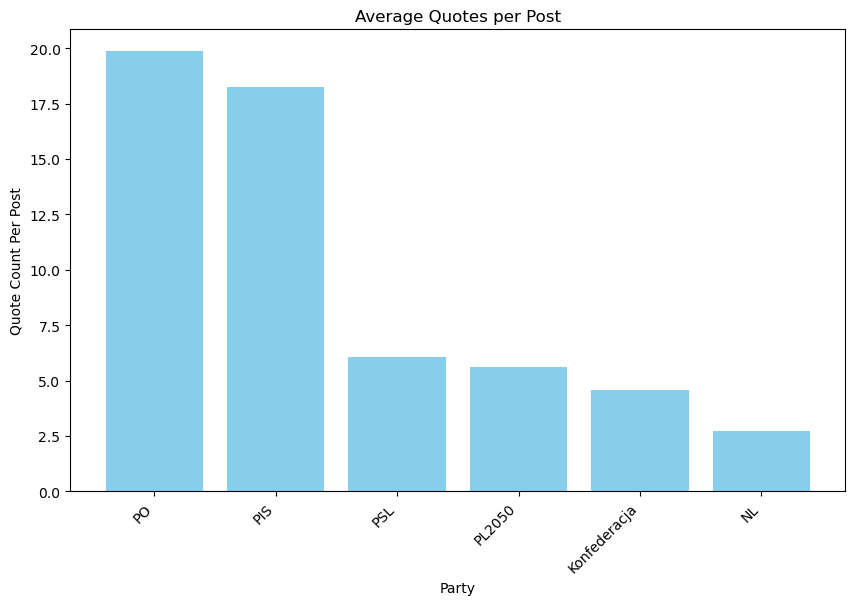

In [60]:
public_metrics_summary = df.groupby('party')[['retweet_count', 'reply_count', 'like_count', 'quote_count']].sum().reset_index()

total_posts_per_party = df['party'].value_counts().reset_index()
total_posts_per_party.columns = ['party', 'total_posts']

public_metrics_summary = public_metrics_summary.merge(total_posts_per_party, on='party')

public_metrics_summary['retweet_count_per_post'] = public_metrics_summary['retweet_count'] / public_metrics_summary['total_posts']
public_metrics_summary['reply_count_per_post'] = public_metrics_summary['reply_count'] / public_metrics_summary['total_posts']
public_metrics_summary['like_count_per_post'] = public_metrics_summary['like_count'] / public_metrics_summary['total_posts']
public_metrics_summary['quote_count_per_post'] = public_metrics_summary['quote_count'] / public_metrics_summary['total_posts']
metrics = ['retweet_count_per_post', 'reply_count_per_post', 'like_count_per_post', 'quote_count_per_post']
titles = ['Average Retweets per Post', 'Average Replies per Post', 'Average Likes per Post', 'Average Quotes per Post']

for i, metric in enumerate(metrics):
    sorted_df = public_metrics_summary.sort_values(by=metric, ascending=False)
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_df['party'], sorted_df[metric], color='skyblue')
    plt.xlabel('Party')
    plt.ylabel(metric.replace('_', ' ').title())
    plt.title(titles[i])
    plt.xticks(rotation=45, ha='right')
    plt.show()


As we can observe, PO has the most active observers, with the highest average number of each public metric. The second party with the highest average number of retweets and replies is PIS. However, in terms of tweet likes and quotes, PL2050 ranks second.

#### 3.7.2 By users

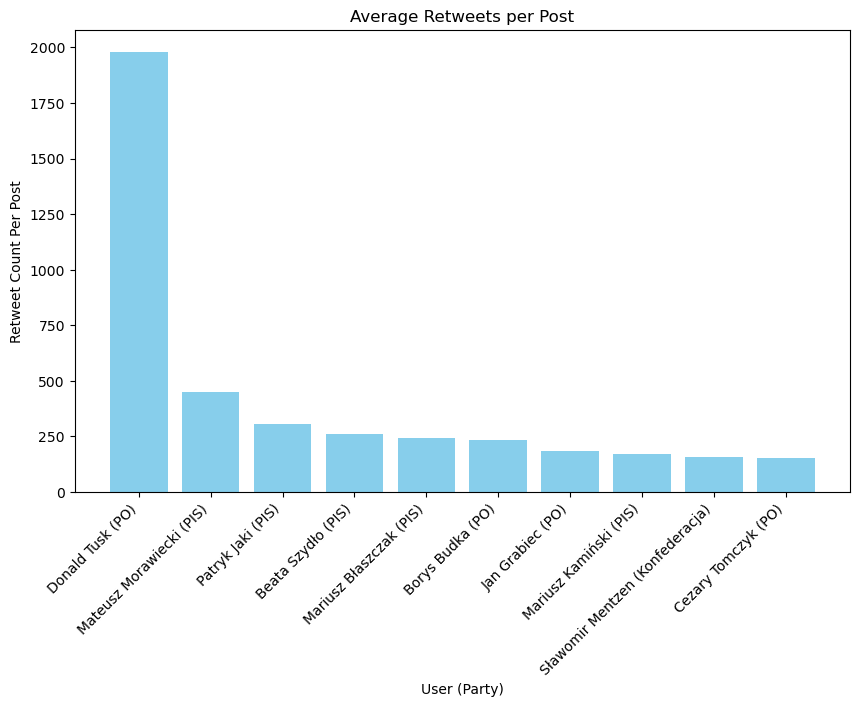

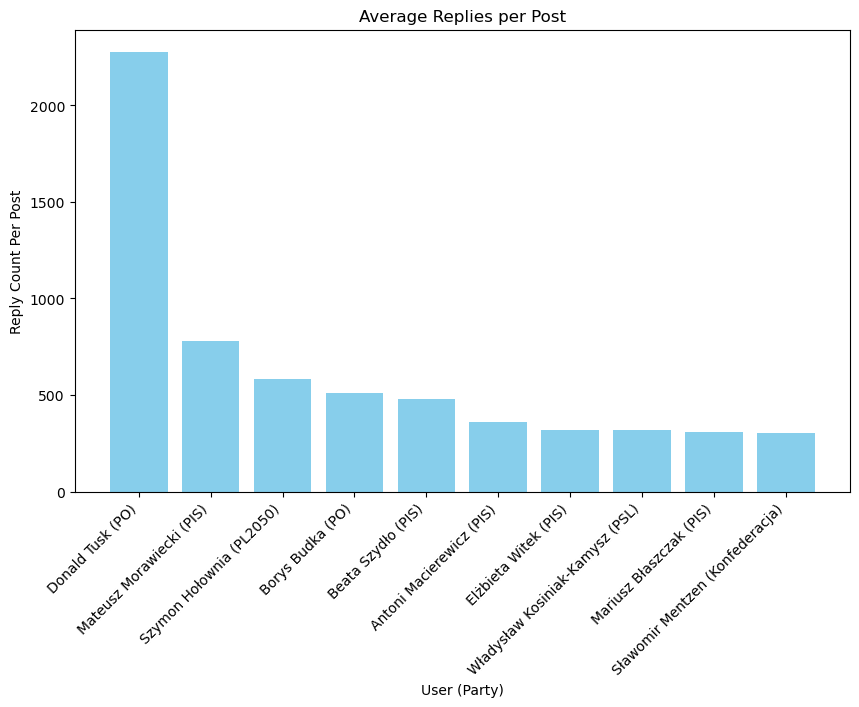

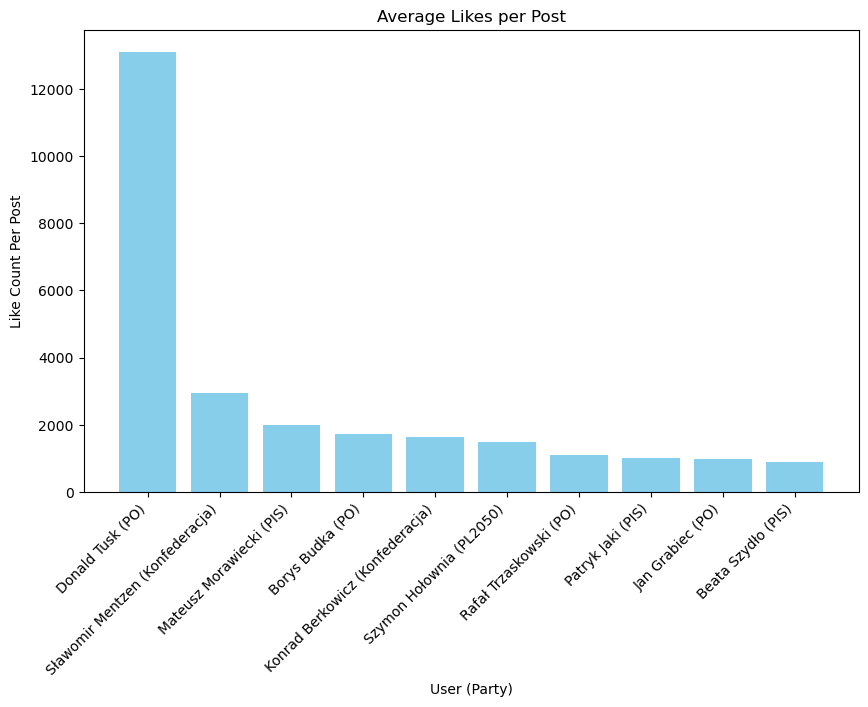

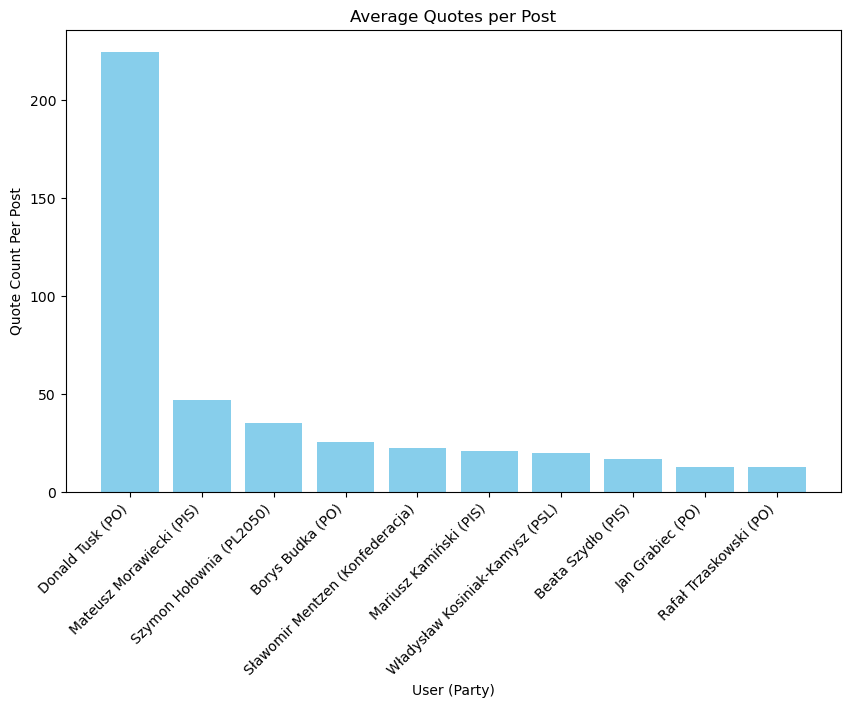

In [61]:
public_metrics_summary_user = df.groupby('name')[['retweet_count', 'reply_count', 'like_count', 'quote_count']].sum().reset_index()

total_posts_per_user = df['name'].value_counts().reset_index()
total_posts_per_user.columns = ['name', 'total_posts']

public_metrics_summary_user = public_metrics_summary_user.merge(total_posts_per_user, on='name')

public_metrics_summary_user['retweet_count_per_post'] = public_metrics_summary_user['retweet_count'] / public_metrics_summary_user['total_posts']
public_metrics_summary_user['reply_count_per_post'] = public_metrics_summary_user['reply_count'] / public_metrics_summary_user['total_posts']
public_metrics_summary_user['like_count_per_post'] = public_metrics_summary_user['like_count'] / public_metrics_summary_user['total_posts']
public_metrics_summary_user['quote_count_per_post'] = public_metrics_summary_user['quote_count'] / public_metrics_summary_user['total_posts']

public_metrics_summary_user = public_metrics_summary_user.merge(df[['name', 'party']].drop_duplicates(), on='name', how='left')

metrics = ['retweet_count_per_post', 'reply_count_per_post', 'like_count_per_post', 'quote_count_per_post']
titles = ['Average Retweets per Post', 'Average Replies per Post', 'Average Likes per Post', 'Average Quotes per Post']

for i, metric in enumerate(metrics):
    sorted_df = public_metrics_summary_user.sort_values(by=metric, ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_df['name'] + ' (' + sorted_df['party'] + ')', sorted_df[metric], color='skyblue')
    plt.xlabel('User (Party)')
    plt.ylabel(metric.replace('_', ' ').title())
    plt.title(titles[i])
    plt.xticks(rotation=45, ha='right')
    plt.show()

Donald Tusk from PO is the most influential politician in Poland, exhibiting the highest engagement in response to his posts among all politicians.

### 3.8 Affiliations

#### 3.8.1 Affiliations before elections

Reading the excel spreadsheet

In [62]:
aff_before = pd.read_excel('data/affiliations/politycy_tabelka.xlsx', sheet_name='afiliacje_przed_0_hot')

In [63]:
#aff_before = aff_before.iloc[:-1]

In [66]:
filtered_affiliations = aff_before[aff_before['Name'].isin(df['name'])]

print(filtered_affiliations.head())

                        Name  poseł  europoseł  samorzad  \
0                Donald Tusk      1          0         0   
2                Borys Budka      1          0         0   
3  Małgorzata Kidawa-Błońska      1          0         0   
4                 Ewa Kopacz      0          1         0   
5          Izabela Leszczyna      1          0         0   

   marszalkowie/wicemarszalkowie (sejm + senat)  posady w ministerstwach  \
0                                             0                        0   
2                                             0                        0   
3                                             1                        0   
4                                             0                        0   
5                                             0                        0   

   prezesi/wiceprezesi partii  przewodniczący klubów parlamentarnych  \
0                           1                                      0   
2                           1         

In [65]:

names_in_df = set(df['name'].unique())
names_in_filtered_affiliations = set(filtered_affiliations['Name'].unique())

missing_names = names_in_df - names_in_filtered_affiliations
print(f"Missing names: {missing_names}")

Missing names: {'Marek Sypniewski', 'Tomasz Trela', 'Katarzyna Pelczyńska', 'Janusz Kozłowski', 'Agnieszka Okła-Drewnowicz', 'Łukasz Osmałek'}


In [ ]:
#TRZEBA NAPRAWIĆ PARQUET - TAK JAK JEST AKTUALNIE W 002 - imiona i nazwiska

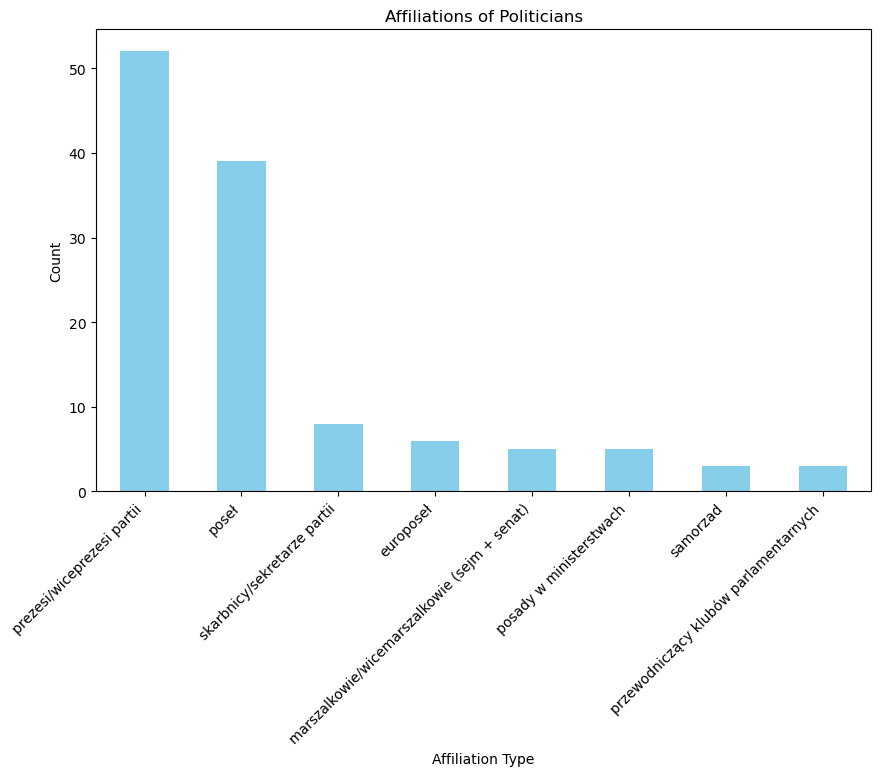

In [67]:
affiliation_counts = filtered_affiliations.iloc[:, 1:].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
affiliation_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Affiliation Type')
plt.ylabel('Count')
plt.title('Affiliations of Politicians')
plt.xticks(rotation=45, ha='right')
plt.show()